In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


데이터 탐색

In [ ]:
# 이미지 사이즈 확인
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# 라벨이름 저장
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

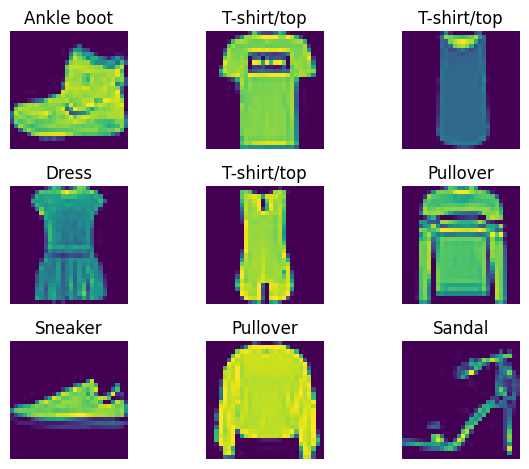

In [ ]:
# 훈련 데이터 시각화
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(label_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

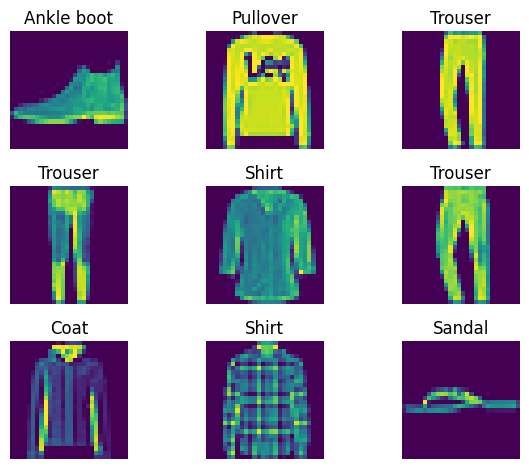

In [ ]:
# 테스트 데이터 시각화
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.title(label_names[y_test[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 데이터 전처리

In [4]:
# 이미지 사이즈 변환
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# 이미지 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# 라벨 인코딩
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape #((60000, 10), (10000, 10))

((60000, 10), (10000, 10))

In [7]:
# 모델 구축
from re import M
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 4.6 MB/s eta 0:00:00


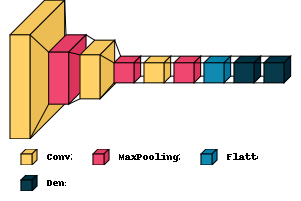

In [ ]:
# 모델 구성 시각화
import visualkeras
visualkeras.layered_view(model, legend=True)

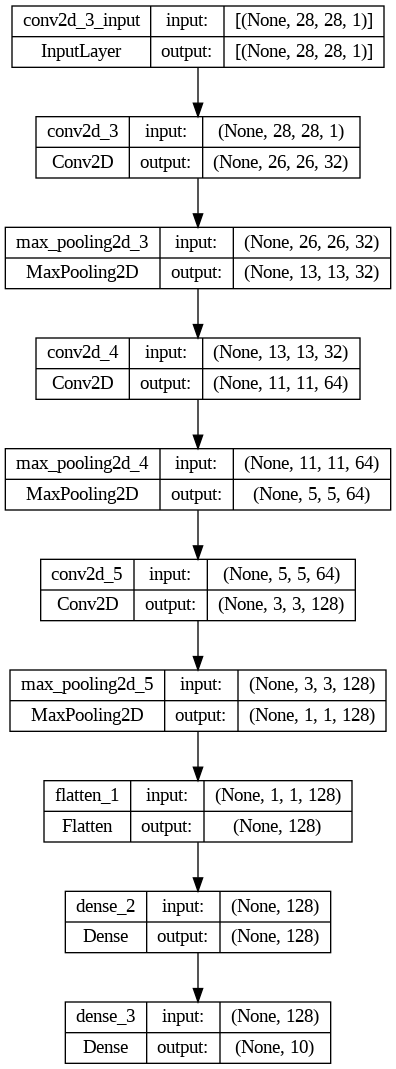

In [ ]:
# 이미지 파일로 시각화
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
# 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 체크포인트
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('fashion_mnist_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/10
937/938 [============================>.] - ETA: 0s - loss: 0.6177 - accuracy: 0.7742
Epoch 1: val_loss improved from inf to 0.49264, saving model to fashion_mnist_model.h5
938/938 [==============================] - 108s 112ms/step - loss: 0.6177 - accuracy: 0.7743 - val_loss: 0.4926 - val_accuracy: 0.8272
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


937/938 [============================>.] - ETA: 0s - loss: 0.4098 - accuracy: 0.8503
Epoch 2: val_loss improved from 0.49264 to 0.39063, saving model to fashion_mnist_model.h5
938/938 [==============================] - 66s 71ms/step - loss: 0.4099 - accuracy: 0.8503 - val_loss: 0.3906 - val_accuracy: 0.8592
Epoch 3/10
937/938 [============================>.] - ETA: 0s - loss: 0.3483 - accuracy: 0.8718
Epoch 3: val_loss improved from 0.39063 to 0.38355, saving model to fashion_mnist_model.h5
938/938 [==============================] - 70s 75ms/step - loss: 0.3484 - accuracy: 0.8719 - val_loss: 0.3836 - val_accuracy: 0.8625
Epoch 4/10
937/938 [============================>.] - ETA: 0s - loss: 0.3144 - accuracy: 0.8830
Epoch 4: val_loss improved from 0.38355 to 0.34250, saving model to fashion_mnist_model.h5
938/938 [==============================] - 83s 88ms/step - loss: 0.3143 - accuracy: 0.8830 - val_loss: 0.3425 - val_accuracy: 0.8770
Epoch 5/10
938/938 [==============================]

In [ ]:
# 모델 저장
model.save('fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 예측
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 6s 19ms/step


array([[2.7711678e-06, 9.3058294e-10, 7.4270946e-07, ..., 2.4199088e-03,
        9.9216572e-07, 9.9753106e-01],
       [6.5096581e-05, 2.7018590e-09, 9.9990696e-01, ..., 4.5564375e-11,
        7.6005556e-08, 4.6919284e-11],
       [3.8289662e-07, 9.9999946e-01, 3.4423264e-09, ..., 5.3386806e-17,
        2.7451896e-09, 8.6094014e-14],
       ...,
       [5.6088956e-11, 1.0500290e-09, 5.3216608e-11, ..., 4.6299194e-11,
        9.9999994e-01, 1.2766791e-12],
       [8.1604376e-06, 9.9994522e-01, 1.5597278e-05, ..., 3.7889549e-09,
        3.9649312e-06, 2.1929395e-07],
       [2.0125646e-05, 1.7903474e-06, 1.9904513e-05, ..., 6.5811910e-03,
        7.2155064e-03, 3.1234161e-04]], dtype=float32)

모델 평가

In [ ]:
# 정확도
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.3147 - accuracy: 0.8886


[0.31474196910858154, 0.8885999917984009]

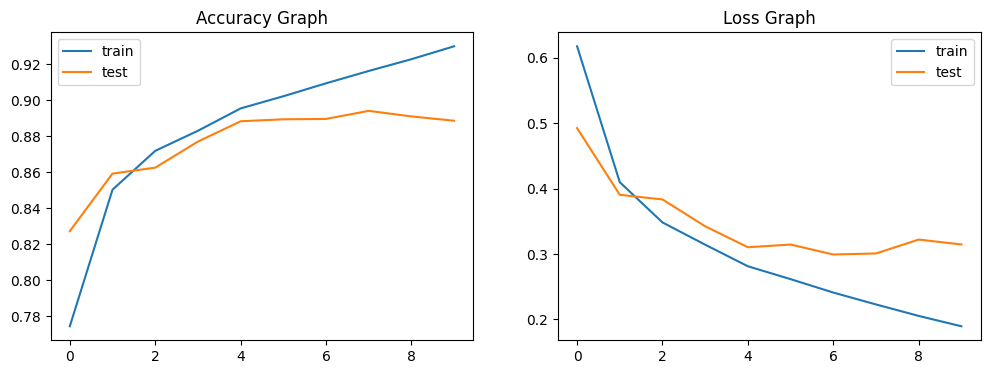

In [ ]:
# 정확도, 로스 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy Graph')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Loss Graph')
plt.show()

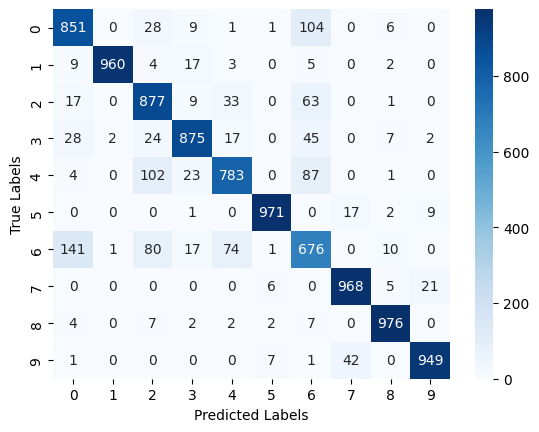

In [ ]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
label_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# 분류리포트
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.78      0.88      0.83      1000
           3       0.92      0.88      0.90      1000
           4       0.86      0.78      0.82      1000
           5       0.98      0.97      0.98      1000
           6       0.68      0.68      0.68      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [20]:
# 테스트 이미지 부르기
from PIL import Image
ankleboot = Image.open('/content/ankleboot.jpg')
ankleboot.size

(690, 1035)

In [21]:
# 이미지를 잘라서 사이즈 변경
ankleboot = ankleboot.crop((100, 400, 600, 900)).resize((28,28))
ankleboot

In [22]:
# 이미지 좌우반전 후 그레이색상으로 변경
ankleboot = ankleboot.transpose(Image.FLIP_LEFT_RIGHT).convert('L')
ankleboot

In [23]:
# 색상을 네거티브로 변경
ankleboot = 255-np.array(ankleboot)
ankleboot

array([[ 45,  45,  44,  43,  42,  42,  41,  41,  40,  40,  39,  39,  38,
         38,  38,  38,  37,  37,  37,  37,  37,  37,  37,  37,  38,  38,
         38,  38],
       [ 45,  45,  44,  43,  42,  42,  41,  41,  40,  40,  39,  39,  38,
         38,  38,  38,  37,  37,  37,  37,  37,  37,  37,  37,  38,  38,
         38,  39],
       [ 45,  45,  44,  43,  42,  42,  41,  41,  40,  40,  39,  39,  38,
         38,  38,  37,  37,  37,  37,  37,  37,  37,  37,  38,  38,  38,
         38,  39],
       [ 45,  45,  44,  43,  42,  42,  41,  41,  40,  40,  39,  39,  38,
         38,  38,  37,  37,  37,  37,  37,  37,  37,  37,  38,  38,  36,
         37,  39],
       [ 45,  44,  44,  43,  42,  42,  41,  40,  40,  40,  39,  39,  38,
         38,  38,  35,  33,  33,  34,  35,  36,  37,  38,  38,  36,  90,
         57,  37],
       [ 45,  44,  44,  43,  43,  42,  41,  41,  40,  40,  39,  39,  38,
         38,  37,  48,  66,  65,  58,  49,  40,  35,  32,  31,  31,  87,
         68,  36],
       [ 45,  44,  44,  43,  42,  42,  41,  40,  40,  39,  39,  39,  38,
         38,  33, 147, 200, 208, 206, 193, 176, 157, 142, 123,  98, 127,
         64,  36],
       [ 45,  44,  44,  43,  42,  41,  41,  40,  40,  40,  39,  39,  38,
         37,  43, 177, 195, 212, 216, 216, 215, 216, 225, 231, 230, 199,
         50,  37],
       [ 45,  44,  44,  43,  42,  41,  41,  40,  40,  39,  39,  38,  38,
         34,  67, 192, 195, 214, 216, 215, 216, 217, 222, 225, 227, 182,
         40,  38],
       [ 45,  44,  43,  43,  42,  42,  41,  40,  40,  39,  39,  38,  38,
         31, 117, 200, 203, 216, 218, 219, 220, 221, 223, 223, 227, 173,
         36,  38],
       [ 45,  44,  43,  43,  42,  41,  41,  40,  40,  39,  39,  38,  37,
         42, 176, 191, 210, 218, 219, 220, 221, 223, 224, 224, 227, 177,
         37,  38],
       [ 45,  44,  43,  43,  42,  41,  41,  40,  40,  39,  39,  38,  30,
        111, 202, 196, 216, 221, 222, 223, 223, 225, 227, 224, 224, 195,
         44,  37],
       [ 44,  44,  43,  42,  42,  41,  41,  40,  39,  39,  39,  32,  73,
        202, 207, 214, 220, 222, 224, 225, 226, 226, 225, 225, 224, 206,
         54,  35],
       [ 44,  44,  43,  42,  42,  41,  40,  40,  39,  39,  35,  53, 187,
        216, 214, 219, 221, 222, 222, 223, 225, 222, 221, 216, 209, 217,
         83,  32],
       [ 44,  44,  43,  42,  41,  41,  40,  40,  40,  35,  44, 168, 218,
        213, 219, 221, 222, 222, 223, 223, 222, 220, 204, 182, 196, 223,
        122,  30],
       [ 44,  44,  43,  42,  42,  41,  41,  40,  34,  49, 164, 223, 201,
        212, 221, 221, 221, 223, 226, 227, 224, 208, 191, 193, 194, 216,
        164,  34],
       [ 44,  44,  40,  37,  37,  36,  35,  37,  76, 177, 227, 215, 208,
        216, 222, 219, 221, 227, 228, 228, 224, 218, 214, 209, 210, 224,
        186,  42],
       [ 45,  41,  61,  95,  98,  91, 101, 145, 200, 223, 224, 221, 219,
        220, 224, 224, 222, 227, 229, 222, 218, 217, 218, 218, 218, 219,
        163,  38],
       [ 42,  68, 196, 220, 215, 210, 218, 224, 223, 221, 220, 218, 218,
        221, 228, 227, 218, 214, 211, 211, 212, 216, 217, 218, 218, 220,
        170,  43],
       [ 38, 114, 211, 190, 213, 226, 226, 226, 226, 223, 218, 216, 221,
        227, 220, 214, 212, 217, 221, 221, 219, 218, 216, 215, 214, 214,
        181,  50],
       [ 39, 153, 218, 211, 212, 221, 226, 226, 227, 225, 222, 220, 219,
        215, 215, 221, 222, 220, 216, 207, 208, 213, 214, 216, 216, 217,
        184,  50],
       [ 38, 144, 210, 211, 213, 217, 220, 222, 224, 224, 221, 218, 217,
        221, 220, 219, 202, 158, 106,  90, 186, 219, 216, 215, 216, 218,
        184,  51],
       [ 43,  52, 106, 150, 198, 213, 214, 216, 216, 215, 216, 216, 216,
        205, 196, 139,  71,  40,  32,  67, 191, 218, 214, 212, 213, 215,
        180,  50],
       [ 61,  78,  89, 103, 139, 180, 195, 216, 219, 224, 219, 219, 216,
        157, 125,  98,  95,  96,  94, 124, 207, 220, 217, 216, 216, 215,
        170,  47],
       [ 46,  50,  56,  63,  69,  74,  8

In [25]:
# 넘파이 배열로 변경
ankleboot = np.array(ankleboot)

In [ ]:
# 정규화
ankleboot = ankleboot / 255.0

In [ ]:
# 이미지 시각화
plt.imshow(ankleboot)
plt.show()

In [38]:
# 이미지 형태 변경
ankleboot = ankleboot.reshape(-1, 28, 28, 1)
ankleboot.shape

(1, 28, 28, 1)

In [31]:
# 저장한 모델 로딩
from keras.models import load_model
model = load_model('/content/fashion_mnist_model.h5')

In [37]:
# 테스트 이미지로 예측
label_names[np.argmax(model.predict(ankeboot), axis=1)[0]]

1/1 [==============================] - 0s 38ms/step


'Ankle boot'